In [1]:
%reload_ext autoreload
%autoreload 2


import gymnasium as gym
from dqn_torch import Agent
import numpy as np


if __name__ == '__main__':
    env = gym.make('CartPole-v1')
    print(env.action_space)
    agent = Agent(gamma=0.99, epsilon=1.0, batch_size=100, n_actions=2,
                  eps_end=0.01, input_dims=[4], lr=0.003) # sample 64 experiences as the minibatch from the original batch
    scores, eps_history = [],[]
    n_games = 700
    
    avg_score_record = []

    for i in range(n_games):
        score = 0
        done = False
        observation = env.reset()[0]
        agent.loss_memory_in_eps.clear() 
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info, _= env.step(action)
            score += reward
            agent.store_transition(observation, action, reward,
                                   observation_, done)
            agent.learn()
            observation = observation_
        agent.loss_memory.append(np.mean(agent.loss_memory_in_eps))
        scores.append(score)
        eps_history.append(agent.epsilon)

        avg_score = np.mean(scores[-100:])
        avg_score_record.append(avg_score)

        print('episode ', i , 'score %.2f' % score,
              'average score %.2f' % avg_score,
              'epsilon %.2f' % agent.epsilon)
    
    
    

Discrete(2)
episode  0 score 19.00 average score 19.00 epsilon 1.00
episode  1 score 14.00 average score 16.50 epsilon 1.00
episode  2 score 13.00 average score 15.33 epsilon 1.00
episode  3 score 23.00 average score 17.25 epsilon 1.00
episode  4 score 21.00 average score 18.00 epsilon 1.00
episode  5 score 15.00 average score 17.50 epsilon 1.00
episode  6 score 41.00 average score 20.86 epsilon 0.98


c:\Users\KaiW\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\KaiW\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Graduate\MASc\RL\RL_doorkick\DQN\dqn_torch.py:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  state = T.tensor([observation]).to(self.Q_eval.device)


episode  7 score 30.00 average score 22.00 epsilon 0.96
episode  8 score 25.00 average score 22.33 epsilon 0.95
episode  9 score 26.00 average score 22.70 epsilon 0.94
episode  10 score 47.00 average score 24.91 epsilon 0.91
episode  11 score 17.00 average score 24.25 epsilon 0.90
episode  12 score 16.00 average score 23.62 epsilon 0.90
episode  13 score 13.00 average score 22.86 epsilon 0.89
episode  14 score 26.00 average score 23.07 epsilon 0.88
episode  15 score 13.00 average score 22.44 epsilon 0.87
episode  16 score 39.00 average score 23.41 epsilon 0.85
episode  17 score 15.00 average score 22.94 epsilon 0.84
episode  18 score 24.00 average score 23.00 epsilon 0.83
episode  19 score 11.00 average score 22.40 epsilon 0.83
episode  20 score 9.00 average score 21.76 epsilon 0.82
episode  21 score 12.00 average score 21.32 epsilon 0.82
episode  22 score 13.00 average score 20.96 epsilon 0.81
episode  23 score 28.00 average score 21.25 epsilon 0.79
episode  24 score 80.00 average sco

KeyboardInterrupt: 

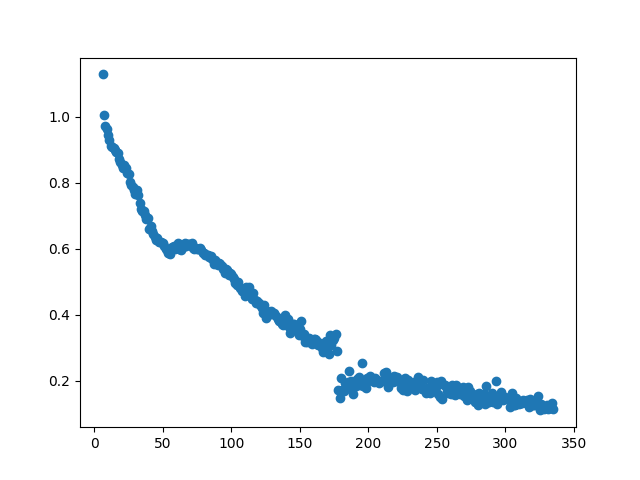

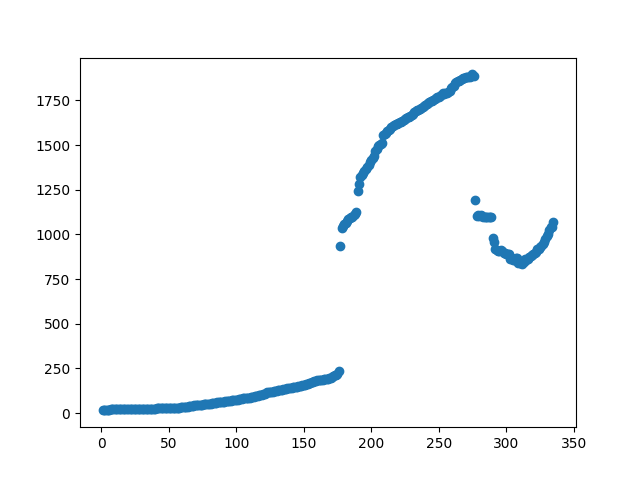

In [2]:
import matplotlib.pyplot as plt
%matplotlib widget

plt.figure()
plt.scatter(range(1,len(avg_score_record)+1), avg_score_record)

# loss_memory = [i.detach().numpy() for i in agent.loss_memory]
plt.figure()
plt.scatter(range(1,len(agent.loss_memory)+1), agent.loss_memory)

plt.show()